<a href="https://colab.research.google.com/github/Boom-Ba/Deep-learning/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [17]:
!pip install matplotlib

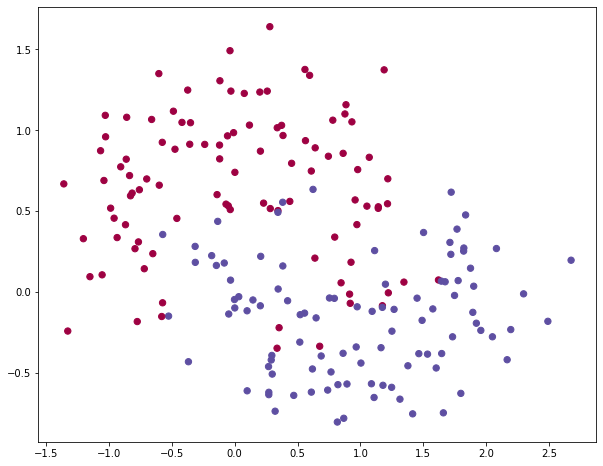

In [19]:
np.random.seed(5)
X,y = sklearn.datasets.make_moons(200, True, noise=0.30)
#print(X)
plt.pyplot.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


Red dots are represented as female patients and Blue dots are male patinets. We are going to apply ML classifier to predict the correct class given x,y coordinate. 
We are going to use Neural Network because Logistic Regression won't be able to fit the data for non-linear features.

Text(0.5, 1.0, 'Logistic Regression')

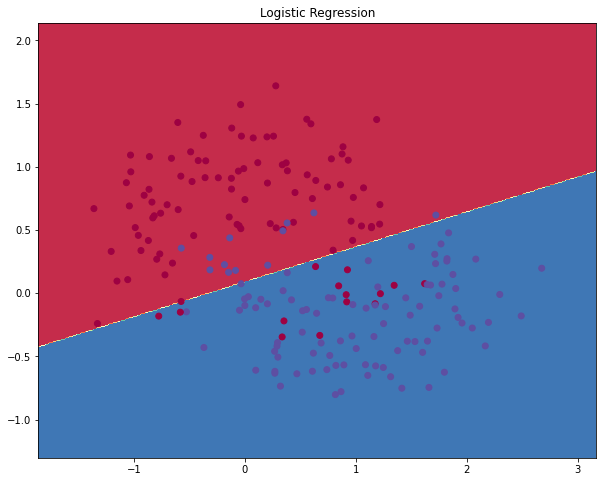

In [26]:
#决策边界
lrc = sklearn.linear_model.LogisticRegressionCV()
lrc.fit(X,y)

def plot_decision_boundary(pred_func): 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gi
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.pyplot.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.pyplot.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
np.meshgrid(np.arange(3),np.arange(3))
plot_decision_boundary(lambda x: lrc.predict(x)) # pred_func=lambda x: clf.predict(x), then Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.pyplot.title("Logistic Regression")

In [27]:
#Neural Network


We are goind to use 3-layer NN with one inout, one hidden, and one output. Number of nodes in input is determined by the dimension of data. Likewise, number of nodes in output layer is determined by the number of classes (we have 2 here: Red / Blue), so we use 0-> for female, 1 for male. 

Input: (x , y) 
Hidden: k=5
Output: (0, 1)

we can choose number of nodes in hidden layer, more nodes we add the more complex functions will be fit. But high dimension costs more fir sure. We have to choose an appropriate size for hidden layer, and we could attempt to adjust the size to see the results.

Activation function we are going to use is tanh, which performs well in many scenarios. A nice property of it is its derivative is f(x)*(1-f(x)).

For output, we will get the probabilities, so we will use softmax to help convert raw scores to probabilities. 

$$
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = \tanh(z_1) \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

We use matrix multiplication to train weights of NN, $z_i$ is the weighted sum of inputs of layer $i$ (bias included) and $a_i$ is the output of layer $i$ after applying the activation function. $W_1, b_1, W_2, b_2$ are  parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $W_1 \in \mathbb{R}^{2\times500}$, $b_1 \in \mathbb{R}^{500}$, $W_2 \in \mathbb{R}^{500\times2}$, $b_2 \in \mathbb{R}^{2}$. Now you see why we have more parameters if we increase the size of the hidden layer.

### Learning the Parameters

Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the *loss function*. A common choice with the softmax output is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$

The formula looks complicated, but all it really does is sum over our training examples and add to the loss if we predicted the incorrect class. So, the further away $y$ (the correct labels) and $\hat{y}$ (our predictions) are, the greater our loss will be. 


Remember that our goal is to find the parameters that minimize our loss function. We can use [gradient descent](http://cs231n.github.io/optimization-1/) to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also [decay the learning rate over time](http://cs231n.github.io/neural-networks-3/#anneal).

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous *backpropagation algorithm*, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations ([here](http://colah.github.io/posts/2015-08-Backprop/) or [here](http://cs231n.github.io/optimization-2/)) floating around the web.

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$


In [71]:
training_exp= len(X)
nn_input_dimension =2
nn_output_dimension=2
epsilon =0.01
lamda =0.01 #regularization strength
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    Z1 = X.dot(W1) + b1
    a1 = np.tanh(Z1)
    Z2 =a1.dot(W2)+b2
    exp_score = np.exp(Z2)
    probs = exp_score/np.sum(exp_score, axis =1, keepdims =True)
    logprobs = -np.log(probs[range(training_exp),y])
    total_loss=np.sum(logprobs)
    total_loss+=lamda/2*(np.sum(np.square(W1))+np.sum(np.square(W2)))
    return 1./training_exp* total_loss

In [65]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_score = np.exp(z2)
    probs = exp_score / np.sum(exp_score, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [66]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dimension, nn_hdim) / np.sqrt(nn_input_dimension)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dimension) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dimension))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_score = np.exp(z2)
        probs = exp_score / np.sum(exp_score, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(training_exp), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += lamda * W2
        dW1 += lamda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.433041
Loss after iteration 1000: 0.216045
Loss after iteration 2000: 0.214282
Loss after iteration 3000: 0.213307
Loss after iteration 4000: 0.212629
Loss after iteration 5000: 0.212170
Loss after iteration 6000: 0.211874
Loss after iteration 7000: 0.211690
Loss after iteration 8000: 0.211578
Loss after iteration 9000: 0.211510
Loss after iteration 10000: 0.211470
Loss after iteration 11000: 0.211445
Loss after iteration 12000: 0.211430
Loss after iteration 13000: 0.211421
Loss after iteration 14000: 0.211416
Loss after iteration 15000: 0.211412
Loss after iteration 16000: 0.211410
Loss after iteration 17000: 0.211409
Loss after iteration 18000: 0.211408
Loss after iteration 19000: 0.211408


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

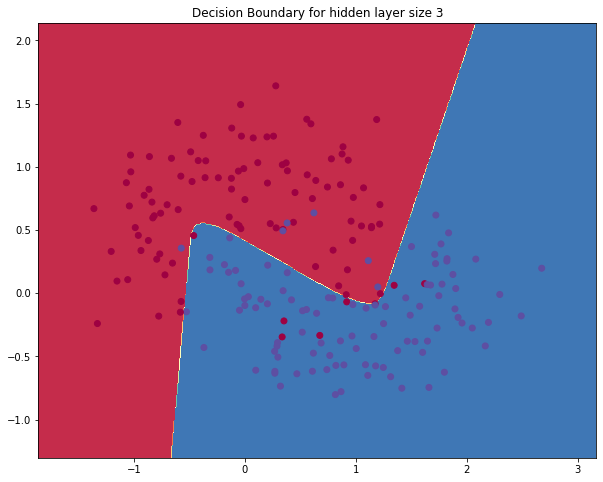

In [73]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.pyplot.title("Decision Boundary for hidden layer size 3")

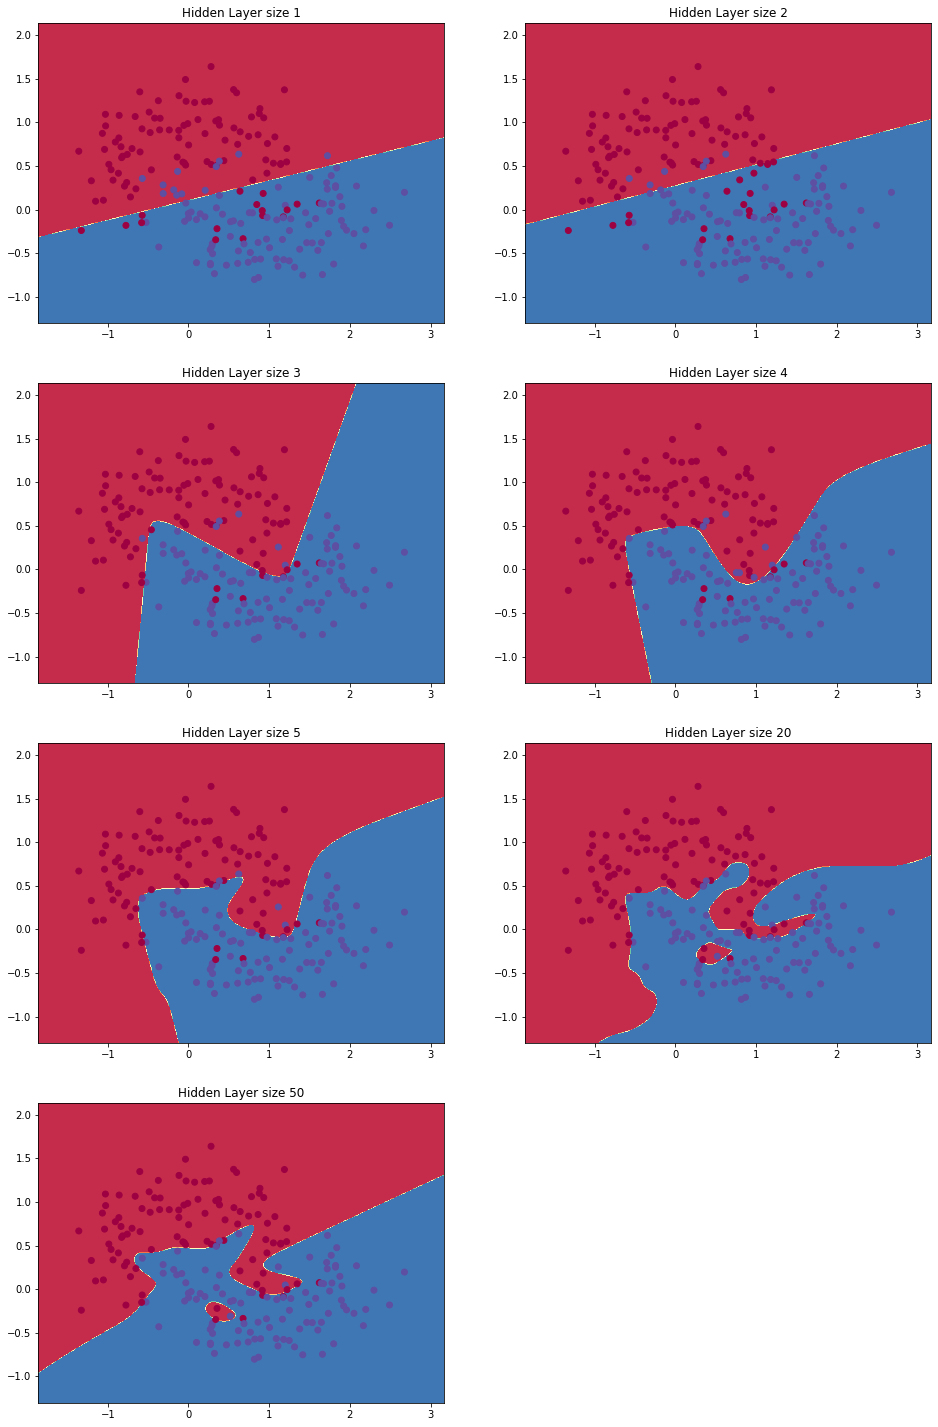

In [77]:
plt.pyplot.figure(figsize=(16,32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.pyplot.subplot(5, 2, i+1)
    plt.pyplot.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.pyplot.show()